Ez az második házifeladat azon Mérnökinformatikus BSC hallgatók részére akik a 2023/24/1 félévben Képfeldolgozást hallgatnak.

In [ ]:
# 2023.10.29
# Fülöp Zalán

### Bevezetés
Olyan szépen süt a nap, hogy kedvem támadt színes egyeneseket rajzolni fehér dobozok éleire.
### Feladat
Olyan rendszert fejlesztek mely bemenetként **dobozt ábrázoló képet** fogad. A rendszer kimenete az **eredeti kép melyre egyenesek vannak rajzolva a doboz látható kilenc éle mentén**. Megértem és használom a **Hough transzformációt** megoldásom során. 
### Adat
Két képet készítettem melyek szélessége és magassága rendre 1150 és 950 képpont. *box_0_resi.jpg* - doboz az asztalon, *box_1_resi.jpg* - doboz az asztal szélén. Megoldásom mindkét képre működik mivel ez a minimum a házifeladat teljesítését illetően.
### Tipp
- Vágd körbe a feladat megoldása szempontjából fontos részt.
- Foglalkozz a feladattal egy ültő helyedben annyit amennyi jól esik. Tudásod és önértékelésed élvezi többször felvenni feladatod fonalát.<br>
- A megoldáshoz vezető úton beugrott ötleteket teszteld le kicsiben egy külön cellában.<br>
- **Jegyzetelj!** Kommentelj a celláidba a kódsorok közé. Mit csinál ez a függvény? Miért ezt a módszert használom? Miért választottam ezt az értéket? Kérdezz magadtól! Könnyedén dokumentálod a munkádat ha nyomon követed a megoldási folyamatot. Én pedig könnyen megértem a gondolkodásmódod/munkafolyamatod mikor olvasom :)

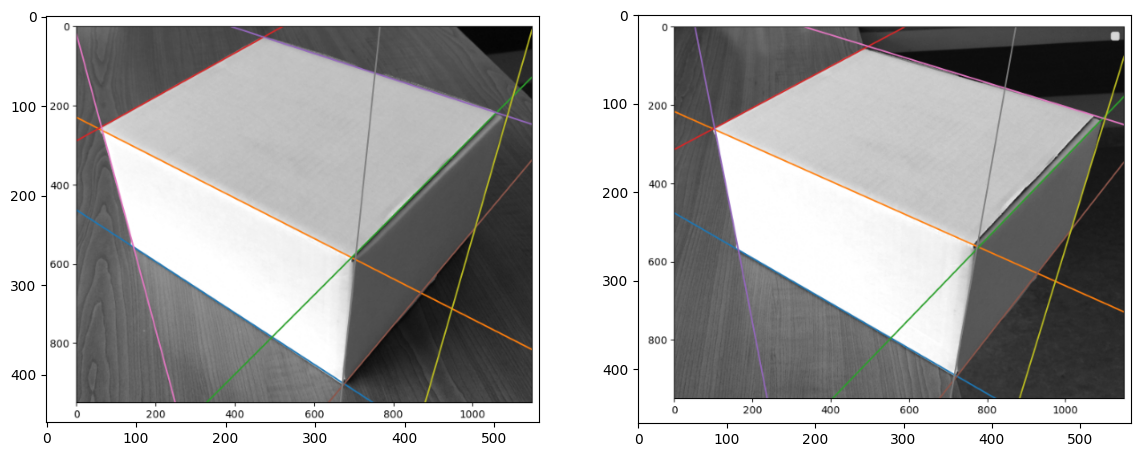

In [1]:
#*: referencia
from PIL import Image
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 10))
axes[0].imshow(Image.open('box_0_sample.png'));
axes[1].imshow(Image.open('box_1_sample.png'));

In [2]:
# Exporting basic functions that I am going to use

import numpy as np 
import scipy
from scipy import ndimage
from PIL import Image
from matplotlib import pyplot as plt

from skimage.feature import canny

In [3]:
# Itt definiáltam egy függvényt, hogy könnyebb legyen sokszor megnézni a képeket munka közben

def ShowImages(images, gray_enabled=False):
    fig, axes = plt.subplots(1, 2, figsize=(14, 10))
    axes[0].imshow(images[0], cmap='gray' if gray_enabled else 'viridis')
    axes[1].imshow(images[1], cmap='gray' if gray_enabled else 'viridis')

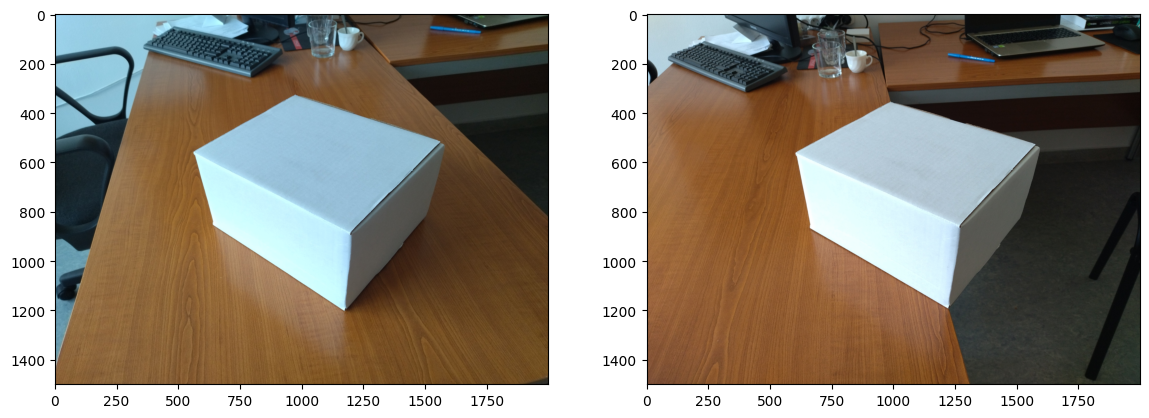

In [4]:
# Loading the images
images = [Image.open('box_0_resi.jpg'), Image.open('box_1_resi.jpg')]

ShowImages(images)

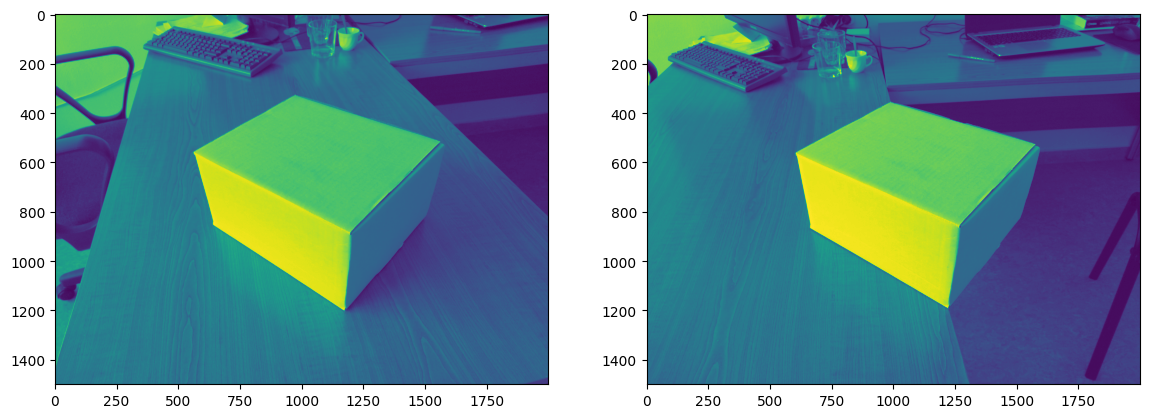

In [5]:
# I convert the images to grayscale and to arrays for preprocessing
gray_images = [np.array(image.convert('L')) for image in images]
ShowImages(gray_images)

Size before:  (1500, 2000) (1500, 2000)
Size after:  (930, 1080) (930, 1080)


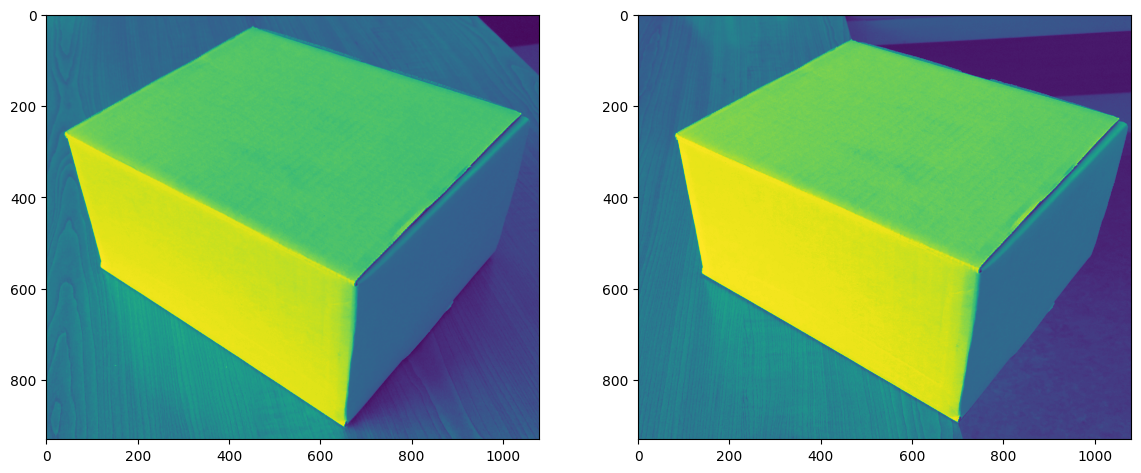

In [6]:
# The images' background have a lot of noise in them that would trip the edges detection
# Therefore I am resizing them by cropping off the unneeded parts

print("Size before: " , gray_images[0].shape, gray_images[1].shape)

# (This is quite arbitrary, so I tried to find a box detection neural network, but somehow I could not find one)

images_cut = [image[300:1230, 520:1600]  for image in gray_images]

print("Size after: " , images_cut[0].shape, images_cut[1].shape)
ShowImages(images_cut)

# I cut the original images too for later use
images_arr = [np.array(image)[300:1230, 520:1600] for image in images]

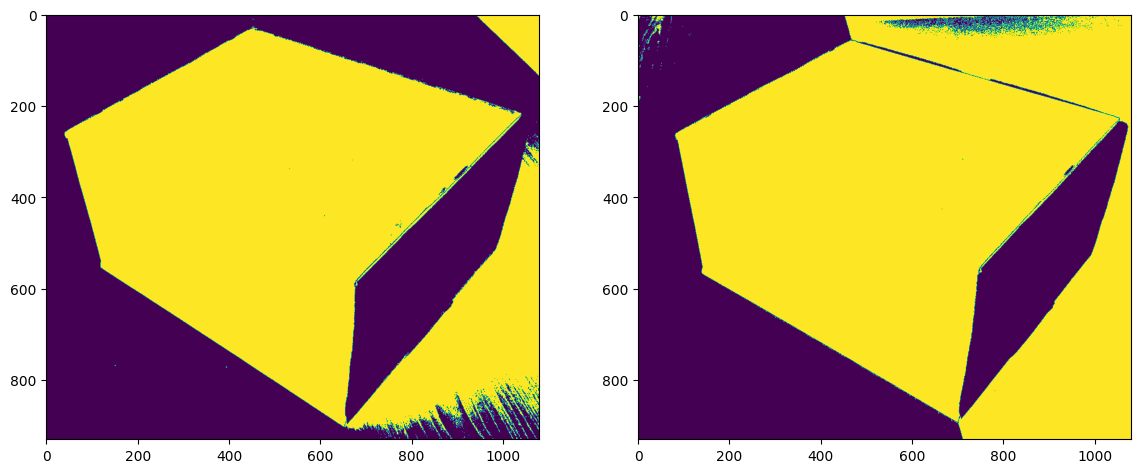

In [7]:
# The time that I spent on this problem was mainly using a lot of different approaches
# to remove the noise from the images

# Here I tried to cut the grayscale values between two values 

h = [image > 170 for image in images_cut]
l = [image < 70 for image in images_cut]

s = [h[i] + l[i] for i in range(2)]

ShowImages(s)

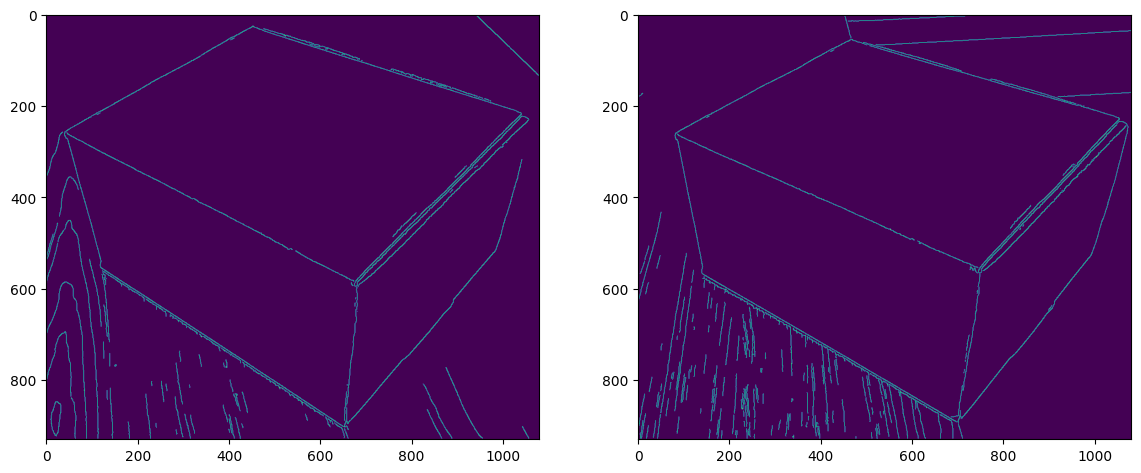

In [8]:
# Which gave good boundaries but also left a lot of noise

s = [canny(image) for image in images_cut]
ShowImages(s)

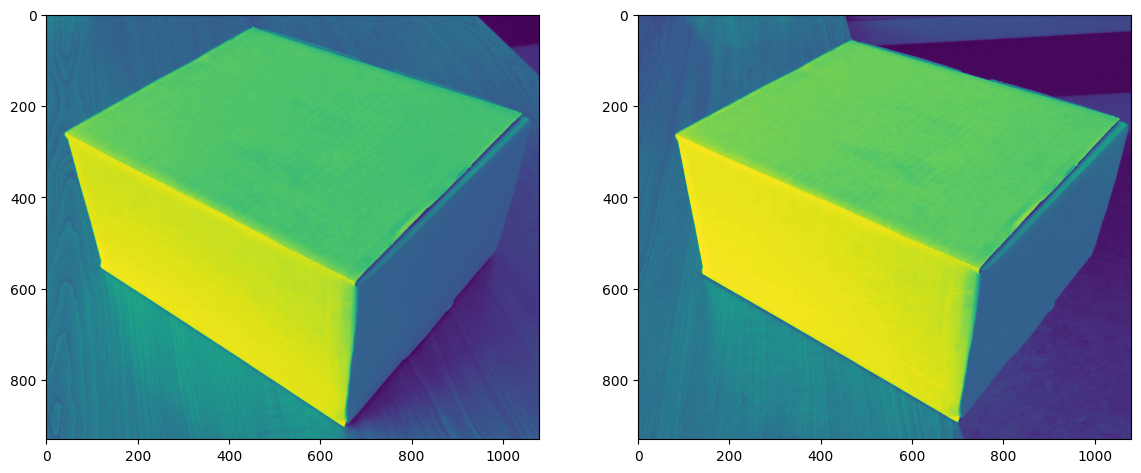

In [9]:
# https://www.youtube.com/watch?v=C_zFhWdM4ic
# I watched this video and experimented a lot with different gaussian filters to smooth out the noise
# At the end I used the median filter which averages areas (the size of the kernel),
# so small points are smoothed into the background
# I used the size of (2, 4) for the kernel to remove more vertical noise at the expense of removing some of the vertical edges too


filtered = [ndimage.median_filter(image, (2, 4)) for image in images_cut]

# filtered = [ndimage.gaussian_filter(image, (2, 3)) for image in images_cut]

ShowImages(filtered)

(array([8.0000e+00, 0.0000e+00, 1.4700e+02, 0.0000e+00, 1.2510e+03,
        0.0000e+00, 3.0630e+03, 0.0000e+00, 0.0000e+00, 1.9840e+03,
        0.0000e+00, 4.5800e+02, 0.0000e+00, 1.6200e+02, 0.0000e+00,
        0.0000e+00, 1.5300e+02, 0.0000e+00, 2.3500e+02, 0.0000e+00,
        3.0700e+02, 0.0000e+00, 0.0000e+00, 4.3000e+02, 0.0000e+00,
        4.3400e+02, 0.0000e+00, 3.9400e+02, 0.0000e+00, 4.2100e+02,
        0.0000e+00, 0.0000e+00, 3.9800e+02, 0.0000e+00, 4.2800e+02,
        0.0000e+00, 5.1200e+02, 0.0000e+00, 0.0000e+00, 5.4000e+02,
        0.0000e+00, 5.7900e+02, 0.0000e+00, 7.5800e+02, 0.0000e+00,
        0.0000e+00, 9.6400e+02, 0.0000e+00, 1.3260e+03, 0.0000e+00,
        1.3500e+03, 0.0000e+00, 1.7340e+03, 0.0000e+00, 0.0000e+00,
        2.0120e+03, 0.0000e+00, 2.0890e+03, 0.0000e+00, 2.2190e+03,
        0.0000e+00, 0.0000e+00, 2.3380e+03, 0.0000e+00, 2.4820e+03,
        0.0000e+00, 2.5500e+03, 0.0000e+00, 0.0000e+00, 2.3720e+03,
        0.0000e+00, 2.2990e+03, 0.0000e+00, 2.49

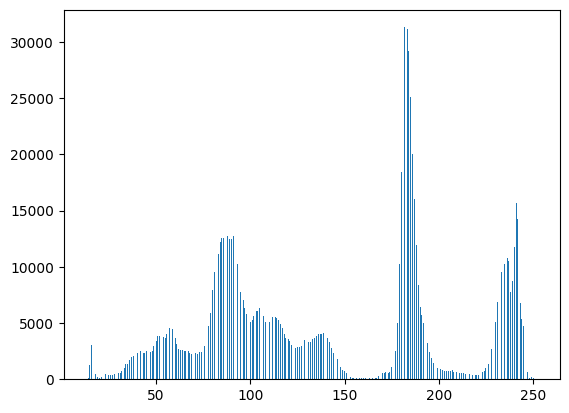

In [10]:
plt.hist(filtered[0].ravel(), 550)

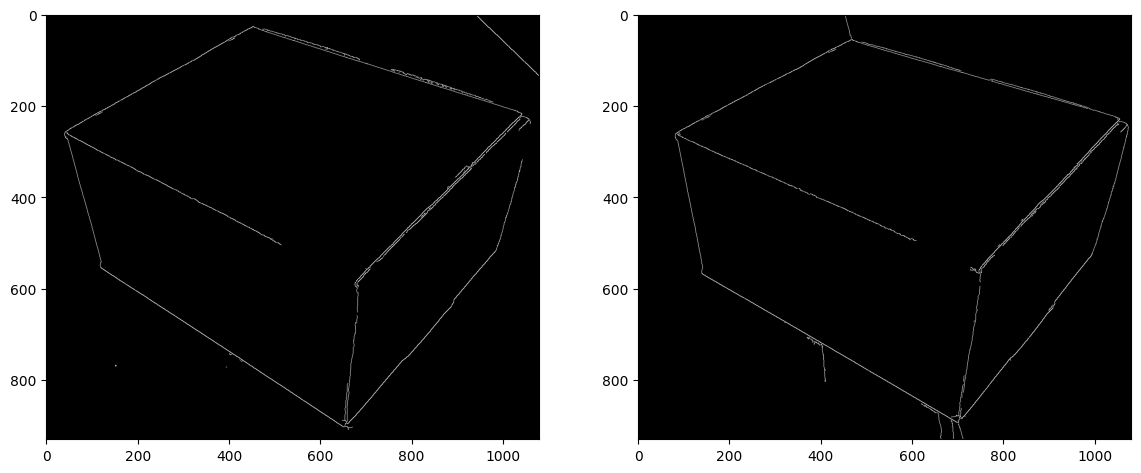

In [11]:
# https://www.youtube.com/watch?v=sRFM5IEqR2w
# Canny for edge detection
# Using 2 thresholds for Hysteresis Thresholding
# This removes a lot of potential edges, but works quite well

import cv2 as cv

edges = [cv.Canny(image, 35, 160) for image in filtered]

ShowImages(edges, gray_enabled=True)

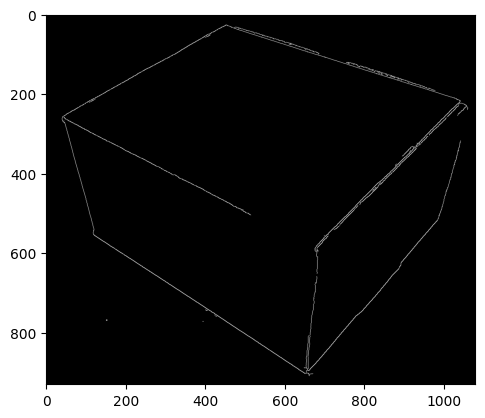

In [12]:
# The first image had a small edge in the upper right corner that I just could not remove with more "sophisticated" methods,
# like morphological operations or filters
# I defined a small box and set the values to zero where the two meet

box_size = 160

edges[0][:box_size, edges[0].shape[1] - box_size:] = 0

plt.imshow(edges[0], "gray")

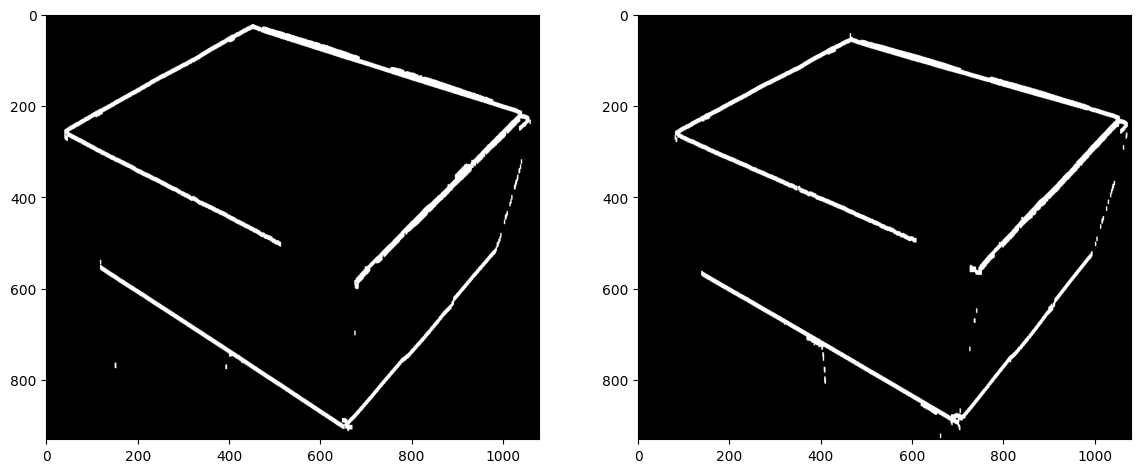

In [19]:
# Before solving the problem I had the idea to separate the horizontal and vertical lines 
# and later add them

hori = [ndimage.grey_opening(image, size=(1, 2)) for image in edges]
hori = [ndimage.grey_dilation(image, size=(10, 2)) for image in hori]

ShowImages(hori, gray_enabled=True)

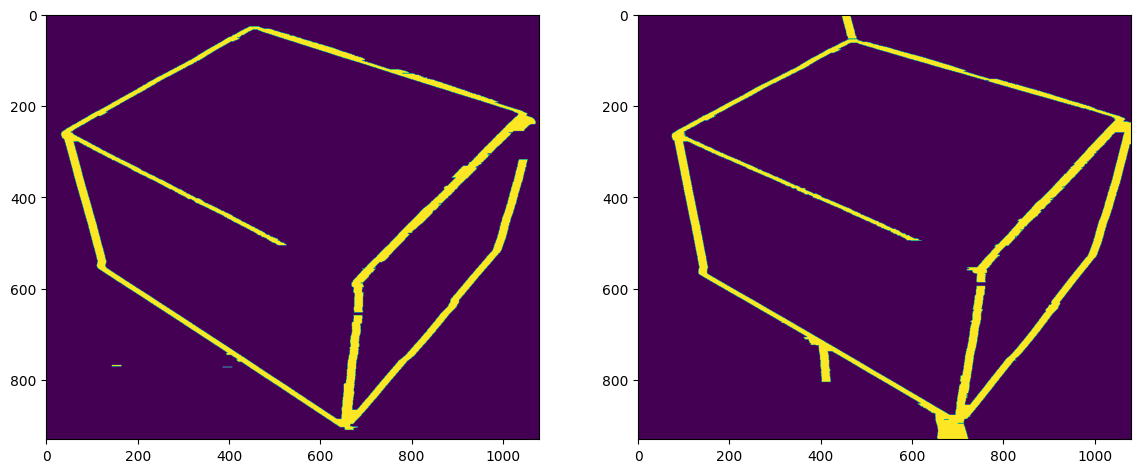

In [20]:
# But this failed at identifying the vertical lines

import cv2
kernel = np.ones((1, 10), np.uint8)

vert = [cv2.dilate(image, kernel, iterations=3) for image in edges]

vert = [cv2.erode(image, kernel, iterations=1) for image in vert]

ShowImages(vert)

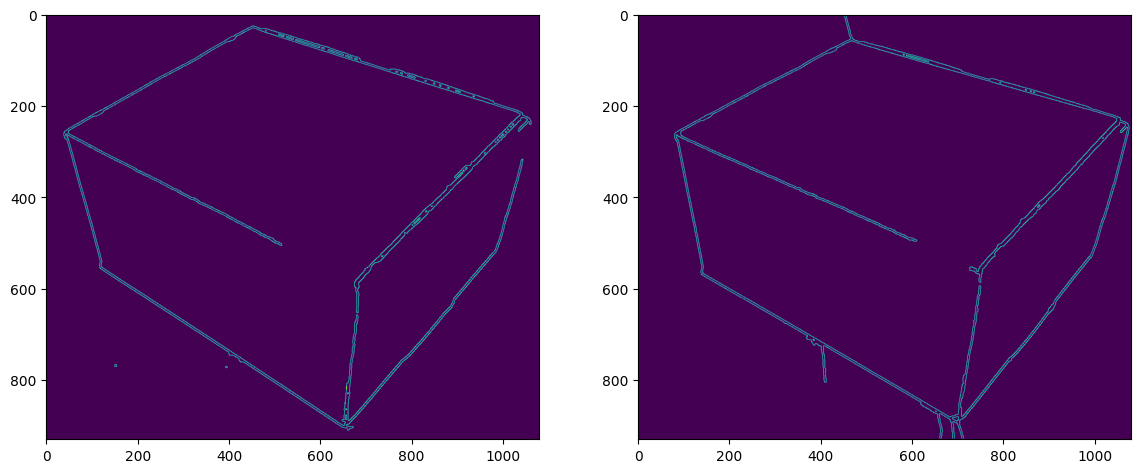

In [21]:
# Here I made the lines a little thicker for better detection
# And further smooth the lines 
# Making the edges thicker results in detecting the boundaries of the line and not the line itself

edge_maps = [ndimage.grey_dilation(image, size=(3, 3)) for image in edges]

# Convolution and gaussian filters worked against my exception
# ho = [ndimage.convolve(image, weights=([[1, 3, 1], [1, 3, 1], [1, 3, 1]])) for image in ho]
# ho = [ndimage.gaussian_filter(image, (3, 3)) for image in ho]

edge_maps = [ndimage.median_filter(image, size=(3, 3)) for image in edge_maps]

# Applying canny for finding the edges
edge_maps = [canny(image) for image in edge_maps]

ShowImages(edge_maps)

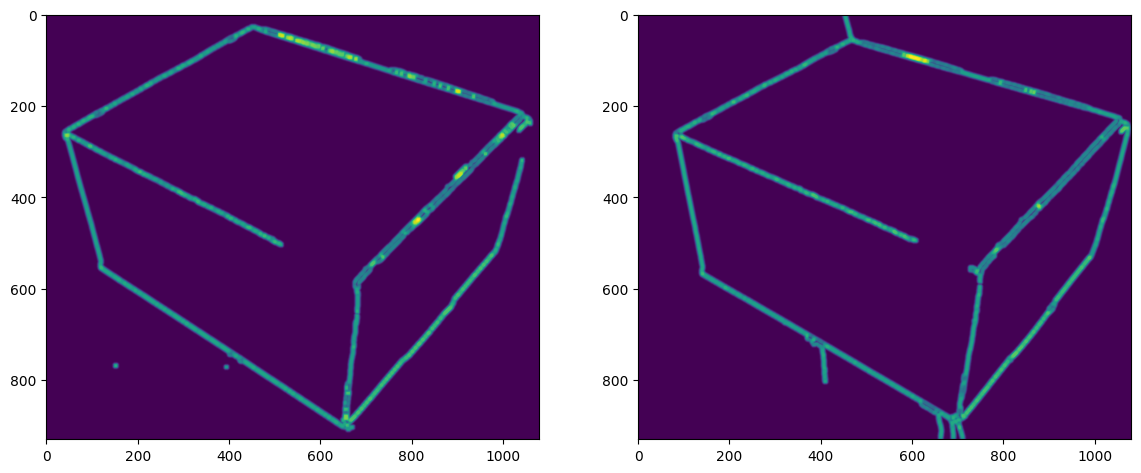

In [22]:
# I tried using adaptive thresholding for automatic detection
import skimage

dil2 = [skimage.filters.threshold_local(image, block_size=15, offset=2) for image in edge_maps]
dil2 = [ndimage.grey_erosion(image, 3) for image in dil2]
dil2 = [ndimage.grey_dilation(image, 5) for image in dil2]

ShowImages(dil2)

In [23]:
from skimage.transform import hough_line, hough_line_peaks

In [24]:
def show_hough_space(image, ax):
    """Computes the hough space of an image and prints it with the lines to a given axis."""
    hspace, angles, dists = hough_line(image)
    
    # I set the min distance to a 100 to avoid detecting the same line multiple times
    # Limited the number of peaks to 9 to only detect 9 edge
    # And lowered the threshold to be able to detect the less intense vertical edges
    hspace_with_lines, angles2, dists2 = hough_line_peaks(hspace, angles, dists, min_distance=100, num_peaks=9, threshold=0.25 * np.max(h))

    ax.imshow(hspace, aspect='auto', vmax=50, cmap='gray')
    
    for i in zip(angles2, dists2):
        ax.vlines(np.degrees(i[0]) + 90, 0, hspace.shape[0])
        # ax.hlines(i[1] + 360, 0, hspace.shape[1] - 1, color='red')
        

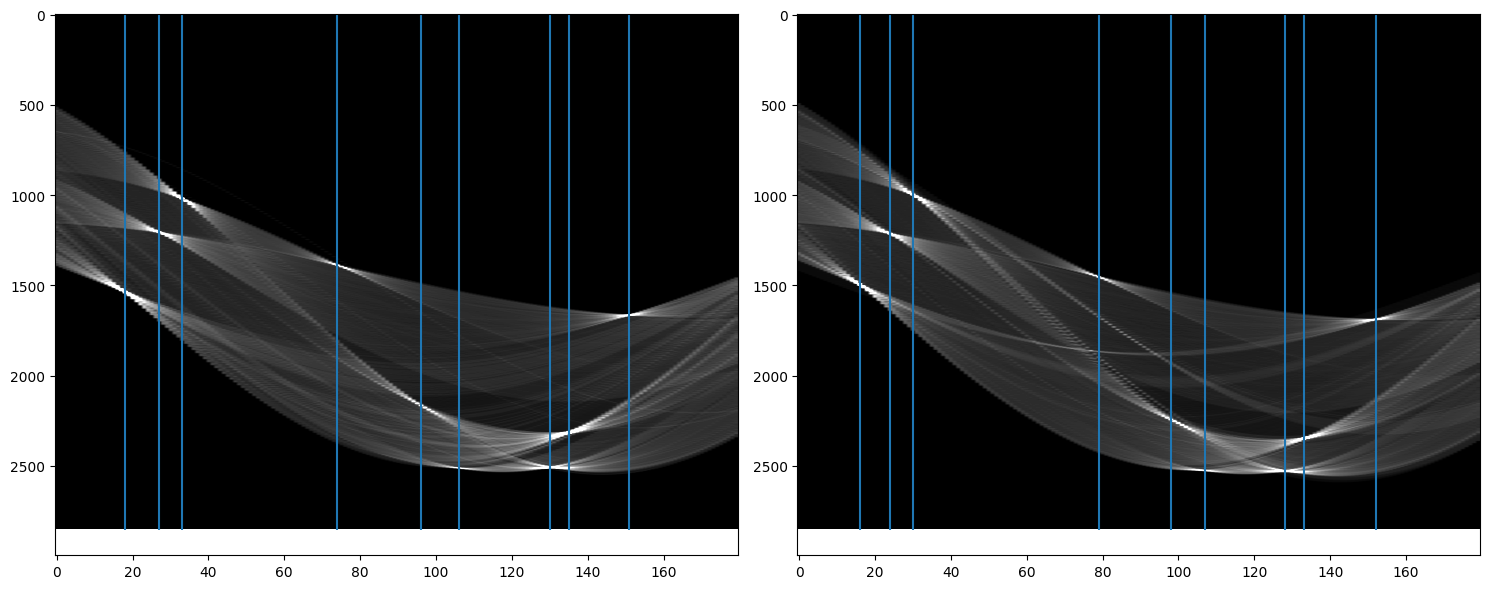

In [25]:
# Printing the hough space for visualization with detected lines
fig, axes = plt.subplots(1, len(edge_maps), figsize=(15, 6))

for i, (image, ax) in enumerate(zip(edge_maps, axes)):
    show_hough_space(image, ax) 

plt.tight_layout()
plt.show()

In [26]:
# This is for testing
# I found that looking at the hough space in a file is easier
# np.set_printoptions(threshold=np.inf)
# np.savetxt('hspace_with_lines.txt', np.array(hspace, dtype=np.int64), fmt='%d')

NameError: name 'hspace_with_lines' is not defined

In [27]:
def show_hough_lines(image, edge_map, ax):
    """Plot an image with its corresponding hough lines on a given axis"""
    hspace, angles, dists = hough_line(edge_map)
    
    ax.imshow(image, cmap='viridis')
    
    for _, angle, dist in zip(*hough_line_peaks(hspace, angles, dists, min_distance=100, num_peaks=9, threshold=0.25 * np.max(h))):
        
        # Where the detected line crosses the left and right edge of the image
        # dist = x * np.cos(angle) + y * np.sin(angle)
        y0 = dist / np.sin(angle)
        y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
        
        ax.plot((0, image.shape[1]), (y0, y1))
        
    # I limited the plot's edges to be the image's to avoid going out of the image
    ax.set_xlim((0, image.shape[1]))
    ax.set_ylim((image.shape[0], 0))
    
    ax.set_axis_off()


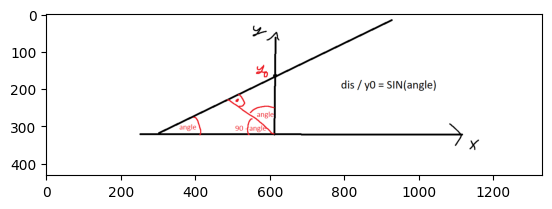

In [28]:
plt.imshow(Image.open('dis per sin ang.png'))

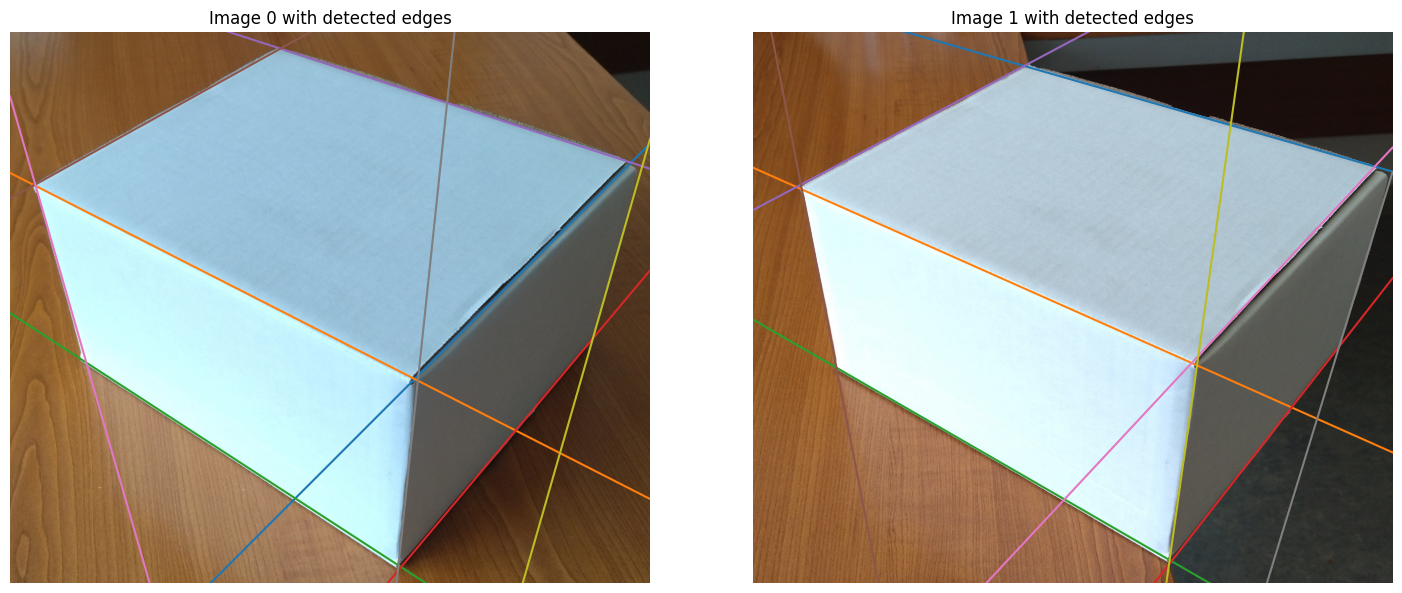

In [29]:
# The solution: the hough lines plotted on the original images
fig, axes = plt.subplots(1, len(images_arr), figsize=(15, 6))

for i, (image, edge_map, ax) in enumerate(zip(images_arr, edge_maps, axes)):
    show_hough_lines(image, edge_map, ax)
    ax.set_title(f"Image {i} with detected edges")
    
plt.tight_layout()
plt.show()